In [1]:
import json

In [2]:
d = json.load(open("most_popular_hashtags.txt"))
popular_hashtags = [u'допускай', u'митинг', u'MoscowProtests', u'митингЗАсвободу', u'протесты']
attendance = {'Jul 20': 22000, 'Jul 27': 5000, 'Aug 03': 3000, 'Aug 10': 60000, 'Aug 17' : 4200 , 'Aug 29': 25000}

dates = []
# for July
for i in range(19,32):
    date = u'Jul '+str(i)
    dates.append(date)

# for August
for i in range(1,32):
    date = u'Aug {0:02d}'.format(i)
    dates.append(date)

In [3]:
d2 = {}

for h in popular_hashtags:
    # (dates, numbers)
    d2[h] = ([],[])

for date in dates:
    pairs = d[date]

    for pair in pairs:
        hashtag, number = pair[0],pair[1]
        if hashtag not in popular_hashtags:
            continue
        d2[hashtag][0].append(date)
        d2[hashtag][1].append(number)
        

for h in popular_hashtags:
    # (dates, numbers)
    existing_dates = d2[h][0]
    
    for date in dates:
        if date not in existing_dates:
            d2[h][0].insert(dates.index(date),date)
            d2[h][1].insert(dates.index(date),0)



In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of tweets', fontsize=22)
plt.title('Progression of popular hashtags per day', fontsize=22)
for hashtag in d2.keys():
    dates, number = d2[hashtag]
    plt.plot(dates, number, label = hashtag)

plt.xticks(list(attendance.keys()), list(attendance.keys()))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.legend(loc=1,prop={'size': 20})
plt.show()


<Figure size 2000x1000 with 1 Axes>

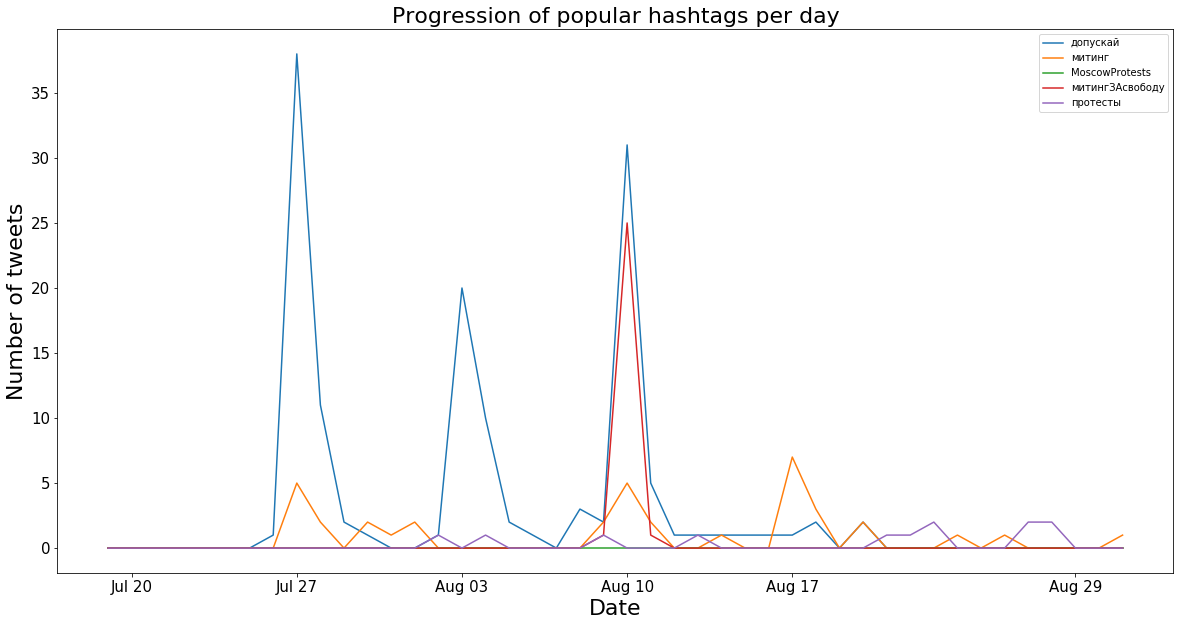

In [5]:
############## ALL RUSSIAN TWEETS
dALL = json.load(open("most_popular_hashtagsALL.txt"))
d2ALL = {}

for h in popular_hashtags:
    # (dates, numbers)
    d2ALL[h] = ([],[])

for date in dates:
    pairs = dALL[date]

    for pair in pairs:
        hashtag, number = pair[0],pair[1]
        if hashtag not in popular_hashtags:
            continue
        d2ALL[hashtag][0].append(date)
        d2ALL[hashtag][1].append(number)
        

for h in popular_hashtags:
    # (dates, numbers)
    existing_dates = d2ALL[h][0]
    
    for date in dates:
        if date not in existing_dates:
            d2ALL[h][0].insert(dates.index(date),date)
            d2ALL[h][1].insert(dates.index(date),0)

from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of tweets', fontsize=22)
plt.title('Progression of popular hashtags per day', fontsize=22)
for hashtag in d2ALL.keys():
    dates, number = d2ALL[hashtag]
    plt.plot(dates, number, label = hashtag)

plt.xticks(list(attendance.keys()), list(attendance.keys()))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.legend()
plt.show()

In [6]:
users = json.load(open("users_per_day.txt"))
user_numbers = []
for date in dates:
    user_numbers.append(users[date])

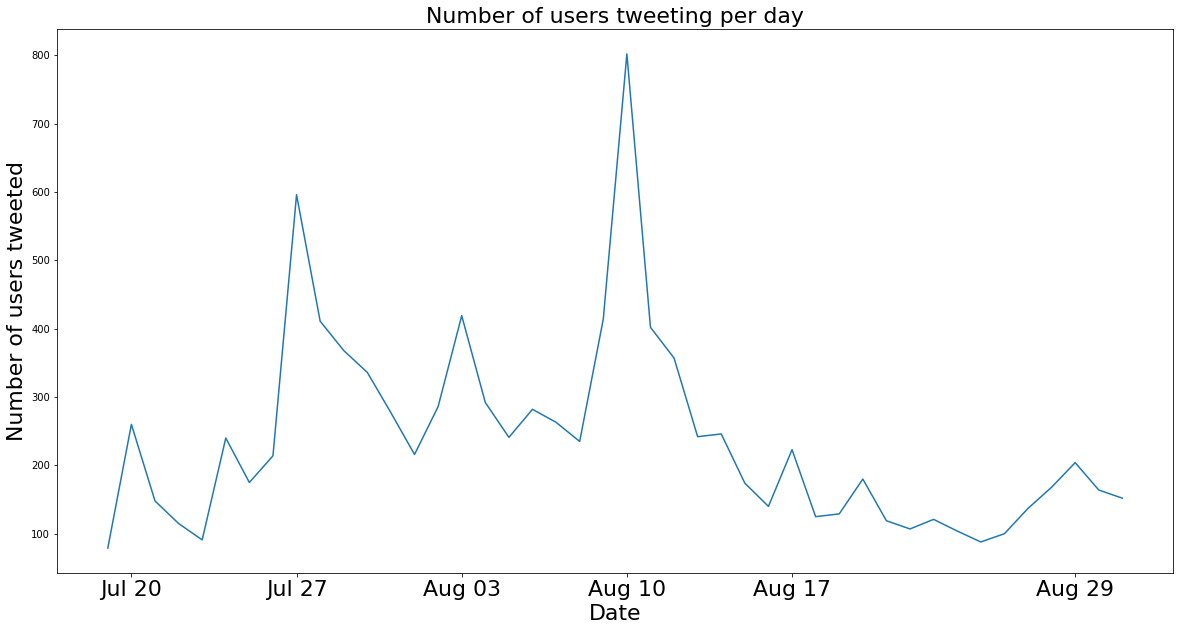

In [7]:
plt.figure(figsize=(20,10))
plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of users tweeted', fontsize=22)
plt.title('Number of users tweeting per day', fontsize=22)
plt.plot(dates, user_numbers)
plt.xticks(list(attendance.keys()), list(attendance.keys()), fontsize=22)
plt.show()


In [8]:
import numpy as np
# date -> attendance
legal = np.array([1,0,0,1,1,1])
attendance_list = np.array(list(attendance.values()))
people_tweeting = np.array([user_numbers[dates.index(date)] for date in attendance.keys()])


In [9]:
def take_date(dictionary, search_att):
    for date, att in dictionary.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if att == search_att:
            return date
        
def is_legal(date):
    l = list(attendance.keys())
    i = l.index(date)
    if legal[i] == 0:
        return False
    else:
        return True

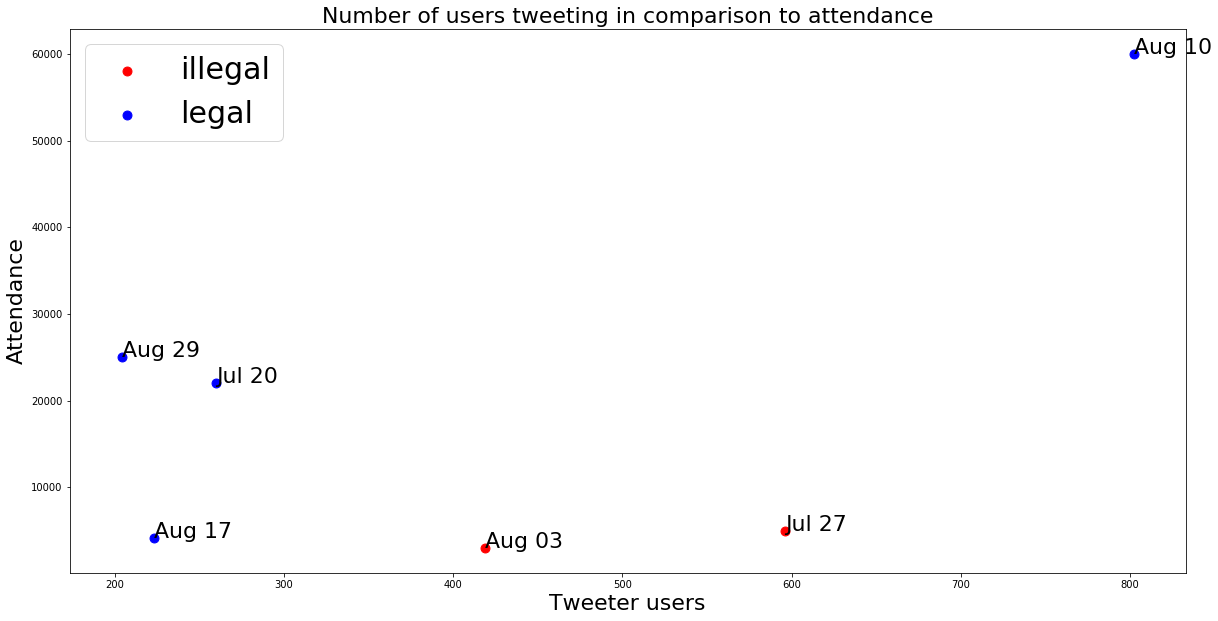

In [10]:
plt.figure(figsize=(20,10))

plt.xlabel('Tweeter users', fontsize=22)
plt.ylabel('Attendance', fontsize=22)
plt.title('Number of users tweeting in comparison to attendance', fontsize=22)
plt.scatter(people_tweeting[legal==0], attendance_list[legal==0], label='illegal', c='r',s=80)
plt.scatter(people_tweeting[legal==1], attendance_list[legal==1], label='legal', c='b',s=80)

for (t,a) in zip(people_tweeting, attendance_list):
    plt.annotate(take_date(attendance,a), (t, a), fontsize=22)
    
plt.legend(loc=2,prop={'size': 30})
plt.show()


In [11]:
print('DATE   |ATTEND |TWEET| RATIO | Legal')
for date in attendance.keys():
    print('%s | %d | %d | %.3f | %s' % 
          (date, attendance[date], user_numbers[dates.index(date)], 
           user_numbers[dates.index(date)] / attendance[date], 'Y' if is_legal(date) else 'N'))

DATE   |ATTEND |TWEET| RATIO | Legal
Jul 20 | 22000 | 260 | 0.012 | Y
Jul 27 | 5000 | 596 | 0.119 | N
Aug 03 | 3000 | 419 | 0.140 | N
Aug 10 | 60000 | 802 | 0.013 | Y
Aug 17 | 4200 | 223 | 0.053 | Y
Aug 29 | 25000 | 204 | 0.008 | Y


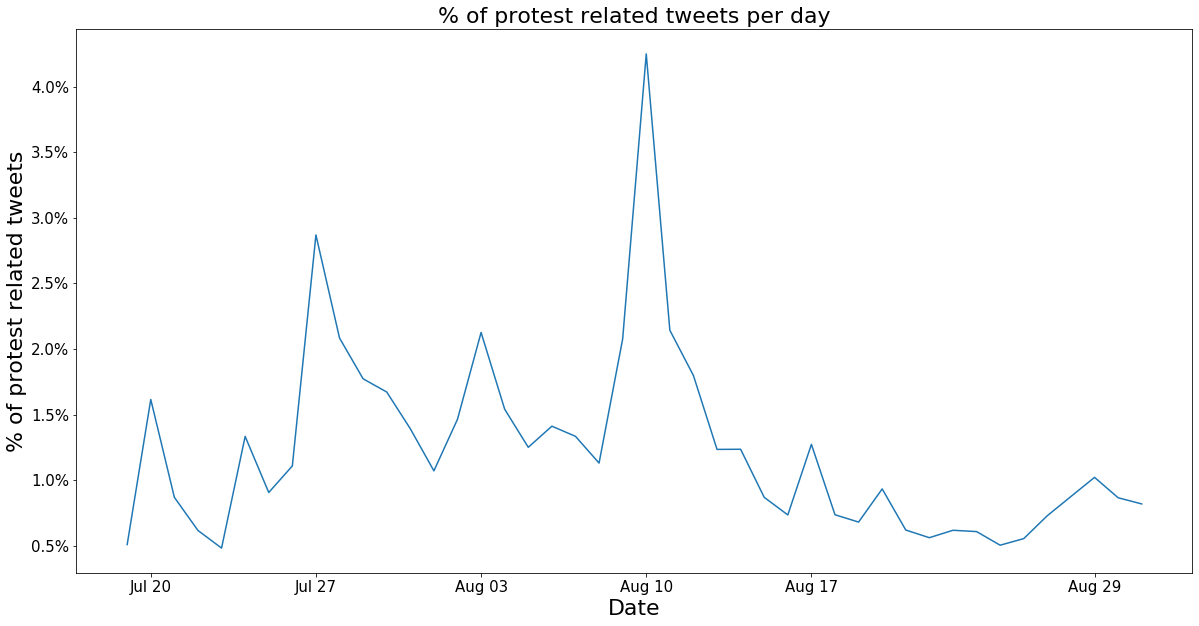

In [15]:
percentage = json.load(open('percentage_per_day.txt'))

per = []
for date in dates:
    if date not in percentage.keys():
        per.append(0)
        continue
    per.append(percentage[date])
                       
plt.figure(figsize=(20,10))
plt.xlabel('Date', fontsize=22)
plt.ylabel('% of protest related tweets', fontsize=22)
plt.title('% of protest related tweets per day', fontsize=22)
plt.plot(dates, per)
plt.xticks(list(attendance.keys()), list(attendance.keys()))
plt.gca().set_yticklabels(['{:01.01f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
                

In [13]:
percentage

{'Aug 12': 0.0179708713897803,
 'Aug 13': 0.012340150271184755,
 'Aug 10': 0.04248740836782526,
 'Aug 11': 0.02142275595359251,
 'Aug 16': 0.007346094154164511,
 'Aug 17': 0.012725344644750796,
 'Aug 14': 0.012351190476190476,
 'Aug 15': 0.008685725630335516,
 'Aug 18': 0.0073575543261278735,
 'Aug 19': 0.0068006182380216385,
 'Aug 30': 0.008654397580939471,
 'Aug 29': 0.01020812685827552,
 'Aug 28': 0.0087505825091907,
 'Jul 23': 0.004817006125975182,
 'Jul 22': 0.0061608130166921175,
 'Jul 21': 0.00868614818223654,
 'Jul 20': 0.016147702280356523,
 'Jul 27': 0.02868685034723798,
 'Jul 26': 0.011078100609295533,
 'Jul 25': 0.009055038445973291,
 'Jul 24': 0.013330545245438863,
 'Jul 29': 0.01771960497093985,
 'Jul 28': 0.02083027724805633,
 'Aug 23': 0.006175044654248533,
 'Aug 22': 0.005609881626351004,
 'Aug 31': 0.008183130983580254,
 'Aug 01': 0.010705382020824168,
 'Aug 03': 0.02125461254612546,
 'Aug 02': 0.01463755807563571,
 'Aug 05': 0.0125,
 'Aug 04': 0.015401425672511578,
 

In [14]:
d2[u'ЗаДопускНаВыборы']

KeyError: 'ЗаДопускНаВыборы'